In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd

dataset = pd.read_excel('/content/drive/My Drive/Book Hackathon/Data_Train.xlsx')
dataset = dataset.drop(['Edition'], axis = 1) 
dataset = dataset.drop(['Genre']  , axis = 1)
dataset = dataset.drop(['Synopsis']  , axis = 1)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,5]


dataset.head()

,Title,Author,Reviews,Ratings,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,13 customer reviews,"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,1 customer review,"Arts, Film & Photography",965.62


Number of author in train set:  3679
Number of Title in train set:  5568
Number of BookCategory in train set:  11
Title           0.0
Author          0.0
Reviews         0.0
Ratings         0.0
BookCategory    0.0
Price           0.0
dtype: float64
Number of outliers:  43


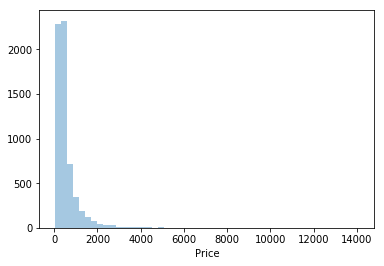

In [16]:
import seaborn as sns
print('Number of author in train set: ', dataset['Author'].nunique())
print('Number of Title in train set: ', dataset['Title'].nunique())
print('Number of BookCategory in train set: ', dataset['BookCategory'].nunique())
print(round(dataset.isnull().sum() / len(dataset) * 100, 4))
print('Number of outliers: ', sum(dataset['Price']>4000))
sns.distplot(dataset['Price'].dropna(), kde=False)

In [17]:
X[:,2]

array(['4.0 out of 5 stars', '3.9 out of 5 stars', '4.8 out of 5 stars',
       ..., '3.8 out of 5 stars', '3.5 out of 5 stars',
       '3.9 out of 5 stars'], dtype=object)

In [0]:
import re
for i in range (0,6237):
  review_col = re.findall(r'\d\W\d', X[:,2][i])
  review_col = float(review_col[0])
  X[:,2][i] = review_col
  #print(review_col)

In [0]:
for i in range (0,6237):
  ratings_col = re.findall(r'\d+', X[:,3][i])
  ratings_col = int(ratings_col[0])
  X[:,3][i] = ratings_col
  #print(ratings_col)

In [20]:
print('Average book review: ', round(X[:,2].mean(), 2))
print('Average book rating: ', round(X[:,3].mean(), 2))


Average book review:  4.29
Average book rating:  29.83


In [0]:
X[:,0] = pd.factorize(X[:,0])[0] 
X[:,1] = pd.factorize(X[:,1])[0] 
X[:,4] = pd.factorize(X[:,4])[0] 
float(X[:,0])

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)


In [0]:
test = pd.read_excel('/content/drive/My Drive/Book Hackathon/Data_Test.xlsx')
test = test.drop(['Edition'], axis = 1) 
test = test.drop(['Genre']  , axis = 1)
test = test.drop(['Synopsis']  , axis = 1)
testing = test.iloc[:,:].values

test.head()

In [0]:
print('Number of Author in test data: ', test['Author'].nunique())
print('Number of Title in test data: ', test['Title'].nunique())
print('Number of BookCategory in test data: ', test['BookCategory'].nunique())

In [0]:
for i in range (0,1560):
  review_col_test = re.findall(r'\d\W\d', testing[:,2][i])
  review_col_test = float(review_col_test[0])
  testing[:,2][i] = review_col_test
  #print(review_col)

  
for i in range (0,1560):
  ratings_col_test = re.findall(r'\d+', testing[:,3][i])
  ratings_col_test = int(ratings_col_test[0])
  testing[:,3][i] = ratings_col_test
  #print(ratings_col)


In [0]:
'''from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
testing[:,0]=le.fit_transform(testing[:,0])
testing[:,1]=le.fit_transform(testing[:,1])
testing[:,4]=le.fit_transform(testing[:,4])


from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
testing = onehotencoder.fit_transform(testing).toarray()

'''

testing[:,0] = pd.factorize(testing[:,0])[0] 
testing[:,1] = pd.factorize(testing[:,1])[0] 
testing[:,4] = pd.factorize(testing[:,4])[0] 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
testing = ss.fit_transform(testing)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

In [0]:
print(testing.shape)
print(X.shape)

In [0]:
prediction = model.predict(testing)
submission = pd.DataFrame({'Price':prediction})
filename = 'prediction_books.xlsx'
submission.to_excel(filename,index=False)
print('Saved file: ' + filename)